[[5.0, 3.4], [5.8, 2.7], [6.7, 3.1]]


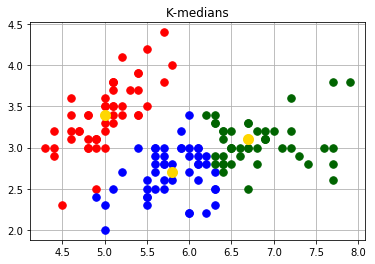

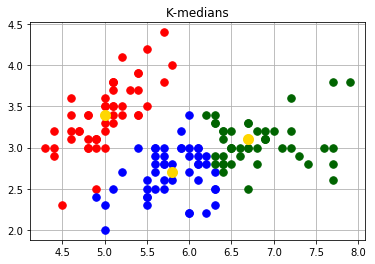

In [23]:
from pyclustering.samples.definitions import SIMPLE_SAMPLES, FCPS_SAMPLES

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedians import kmedians

from pyclustering.utils import draw_clusters
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values
x_sepal = dataset.iloc[:, [1, 2]].values
x_full = dataset.iloc[:, [1, 2, 3, 4, 5]].values

start_medians = [[5.0, 3.0], [6.0, 3.0], [7.0, 3.0]]
tolerance = 0.1

kmedians_instance = kmedians(x_sepal, start_medians, tolerance)

(ticks, result) = timedcall(kmedians_instance.process)

kmedians_instance.process()

clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

print(medians)
#print(clusters)

#draw_clusters(x_sepal, clusters)
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, x_sepal, canvas = 0, marker = '.', markersize = 15)
#visualizer.append_cluster(start_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, canvas = 0, marker='.', markersize=20)
visualizer.set_canvas_title('K-medians', canvas = 0)
visualizer.show(invisible_axis = False, visible_grid = True, display = True, shift = 0 )